# Linear Regression

- In this study, we will analyse two variables to check if they are correlated. The dependant variable has the feature name "MarathonTime" and contains the marathon times of the runners. The independant variable has the feature name "km4week" and contains the average amount of KMs ran by each marathon participant in the 4 weeks leading up to the marathon.

- The null hyothesis states that there is no relationship between the 2 variables.
However, if the null hypothesis proves to be false then the alternative hypothesis states that there is statistical significance between two variables.



In [15]:
%matplotlib inline                    
import numpy as np                          # Numpy is a library mainly used for working with arrays
import pandas as pd                         # Pandas is a Python library mainly used for working with data sets 
import matplotlib.pyplot as plt             # Matplot lib is used for plotting, in this case pyplot will be used to create a scatter plot
 

dataset = pd.read_csv("MarathonData.csv")   # Variable called dataset is now assigned the values of csv "MarathonData.csv" file

dataset.head()                              # This function acts as a test to see did the file upload correctly, if so it will display the first 5 rows of data





,id,Marathon,Category,km4week,sp4week,Wall21,MarathonTime,CATEGORY
0,1,Prague17,MAM,132.8,14.434783,1.16,2.37,A
1,2,Prague17,MAM,68.6,13.674419,1.23,2.59,A
2,3,Prague17,MAM,82.7,13.520436,1.30,2.66,A
3,4,Prague17,M45,137.5,12.258544,1.32,2.68,A
4,5,Prague17,MAM,84.6,13.945055,1.36,2.74,A


In [16]:
dataset.tail()                              # Similar to the above, this function shows the last 5 rows of data and conveniently shows the amount of total rows (80)
                                            # Please note that the id column shows 87 id's, however, 7 have been removed in excel for having blank data



,id,Marathon,Category,km4week,sp4week,Wall21,MarathonTime,CATEGORY
76,83,Prague17,M55,50.0,10.830325,2.02,3.93,D
77,84,Prague17,M40,33.6,10.130653,1.94,3.93,D
78,85,Prague17,M40,55.4,11.043189,1.94,3.94,D
79,86,Prague17,M45,33.2,11.066667,2.05,3.95,D
80,87,Prague17,M40,17.9,10.848485,2.05,3.98,D


In [17]:
dataset.drop(["id","Marathon","Category","sp4week","Wall21","CATEGORY"], axis=1, inplace = True)  # The drop function will drop columns that we do not need in this analysis, the id to category columns are passed in
                                                                                                  # as a list as those are the columns not needed. The second parameter is "axis=1" which tells the function that
                                                                                                  # it needs to look on the vertical axis. The third parameter "inplace=True" ensures that the changes will 
                                                                                                  # remain in place on the dataset and will not revert back to the original
                                                                                                  
                                                                                                  
dataset.head() # Check to see if the "drop" function has worked successfully

,km4week,MarathonTime
0,132.8,2.37
1,68.6,2.59
2,82.7,2.66
3,137.5,2.68
4,84.6,2.74


In [18]:
from scipy import stats                                         # All of the statistics functions are located in the sub-package scipy.stats and is needed for the linear regression

averageKMs = dataset["km4week"]                                 # This assigns the values from the feature "km4week" from the dataset as an array to the variable "averageKMs" - and will be the x variable
marathonTime = dataset["MarathonTime"]                          # This assigns the values from the feature "MarathonTime" from the dataset as an array to the variable "marathonTime" - and will be the y variable

slope, intercept, r_value, p_value, std_err = stats.linregress(averageKMs, marathonTime) # The stats.linregress functions takes 2 array parameters as x and y values and returns the slope, intercept etc.


- The R-squared value below shows that there is a low (< 0.5) correlation between the 2 variables. This is not that much of a surprise as other variables such as gender and age which will also play a big role in determining marathon times

In [35]:
r_sqr = r_value ** 2
print("The r squared value is: " + str(r_sqr))

The r squared value is: 0.3962841407763937


- The scatter plot below shows that the variables are negatively correlated. I.e., as the average Avg KMs ran (4 weeks prior to the race) increase, the marathon completion time decreases.                                                     
- Also, note that the regression line predicts the change in y when x increases by 1 unit

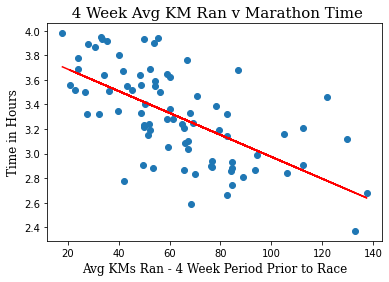

In [36]:
import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept        # This predict() function will accept an x value as a parameter and then return the y value (y = mx + b) 
                                        # in order to obtain the predicted y value to fit the regression line

fitLine = predict(averageKMs)           # The fitline variable is now assigned the y axis values of the predict() function

plt.scatter(averageKMs, marathonTime)   # plt.scatter will map all the x,y values as data points on a scatter plot
plt.plot(averageKMs, fitLine, c='r')    # this function now plots the line 

font1 = {'family':'serif','color':'black','size':15} # Font dictionary to change the standard title size, colour and font
font2 = {'family':'serif','color':'black','size':12} # Font dictionary to change the standard x and y labels

plt.title(" 4 Week Avg KM Ran v Marathon Time", fontdict = font1)               # Title of the scatter chart, second parameter is used to change the font
plt.xlabel("Avg KMs Ran - 4 Week Period Prior to Race", fontdict = font2)       # Title of the x axis, second parameter is used to change the font
plt.ylabel("Time in Hours", fontdict = font2)                                   # Title of the y axis, second parameter is used to change the font
plt.show()                                                                      # Function to print the scatter chart

- Please note the below in relation to slope, intercept, r-squared value, p-value, and standard error.

In [42]:
print("The slope is: " + str(slope))                   # This is necessary for predicting the y value in the regression line, and is the "m" in the formula y = mx + b
print("The intercept is: " + str(intercept))           # This is the y value when x = 0, and is the "b" in the formula y = mx + b
print("The r-squared value is: " + str(r_sqr)) 
print("The p value is: " + str(p_value))               # A low p value shows low probability of statistical error
print("The standard error is: " + str(std_err))        # A low standard error value shows that the statistical accuracy is high

The slope is: -0.008925539034497566
The intercept is: 3.866104110350183
The r-squared value is: 0.3962841407763937
The p value is: 3.074761763533182e-10
The standard error is: 0.001239463819897981
